<a href="https://colab.research.google.com/github/Danicoder/ChuletasGit/blob/main/2.%20CNN%3A%20modelo%20mejorado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

import keras


import os
import zipfile
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Resizing, Rescaling,RandomFlip, RandomRotation, RandomBrightness,Lambda,Dropout,BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from keras.optimizers import RMSprop
from keras.preprocessing import image

print(tf.__version__)

2.18.0


In [3]:
#from google.colab import files
# se debe cargar el fichero “cats_and_dogs_small.zip” aunque lo podemos descargar online mientras esté disponible
#files.upload()

!wget --no-check-certificate  https://www.dropbox.com/s/sshnskxxolkrq9h/cats_and_dogs_small.zip?dl=0    -O /content/cats_and_dogs_small.zip

--2025-03-04 21:11:20--  https://www.dropbox.com/s/sshnskxxolkrq9h/cats_and_dogs_small.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/fzumgwvkdu4ehylzw2orv/cats_and_dogs_small.zip?rlkey=1bgfuemw7x2gjwthle3caf4kj&dl=0 [following]
--2025-03-04 21:11:21--  https://www.dropbox.com/scl/fi/fzumgwvkdu4ehylzw2orv/cats_and_dogs_small.zip?rlkey=1bgfuemw7x2gjwthle3caf4kj&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc628d23c7ab279803b0050fbe25.dl.dropboxusercontent.com/cd/0/inline/ClREfkiwu-bIDWef9eGjz7DucsqE1kZmGy5zDlqcW-cps55Eg-7ZvtY-N7bs6XVtyrH2xcrilApbSpBNfL3RI9w9f6Y029vIbNS86pCYBVP6fGYfObei6DJxNasMP2cDI_s/file# [following]
--2025-03-04 21:11:21--  https://uc628d23c7ab279803b0050fbe25.dl.dropbo

In [4]:
#Extraemos el contenido
local_zip = 'cats_and_dogs_small.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()

In [5]:
base_dir = '/content/cats_and_dogs_small'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imagenes de validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directorio con las imagenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [6]:
train_cat_fnames = os.listdir( train_cats_dir )
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir( train_dogs_dir )
print(train_dog_fnames[:5])

validation_cat_fnames = os.listdir( validation_cats_dir )
print(validation_cat_fnames[:5])

validation_dog_fnames = os.listdir( validation_dogs_dir )
print(validation_dog_fnames[:5])

test_cat_fnames = os.listdir( test_cats_dir )
print(test_cat_fnames[:5])

test_dog_fnames = os.listdir( test_dogs_dir )
print(test_dog_fnames[:5])


['cat.683.jpg', 'cat.732.jpg', 'cat.593.jpg', 'cat.960.jpg', 'cat.306.jpg']
['dog.60.jpg', 'dog.580.jpg', 'dog.747.jpg', 'dog.49.jpg', 'dog.401.jpg']
['cat.1077.jpg', 'cat.1067.jpg', 'cat.1492.jpg', 'cat.1087.jpg', 'cat.1374.jpg']
['dog.1184.jpg', 'dog.1454.jpg', 'dog.1451.jpg', 'dog.1048.jpg', 'dog.1049.jpg']
['cat.1724.jpg', 'cat.1995.jpg', 'cat.1933.jpg', 'cat.1680.jpg', 'cat.1555.jpg']
['dog.1933.jpg', 'dog.1976.jpg', 'dog.1912.jpg', 'dog.1526.jpg', 'dog.1866.jpg']


In [7]:
print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

print('total test cat images :', len(os.listdir( test_cats_dir ) ))
print('total test dog images :', len(os.listdir( test_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500
total test cat images : 500
total test dog images : 500


Train Cats


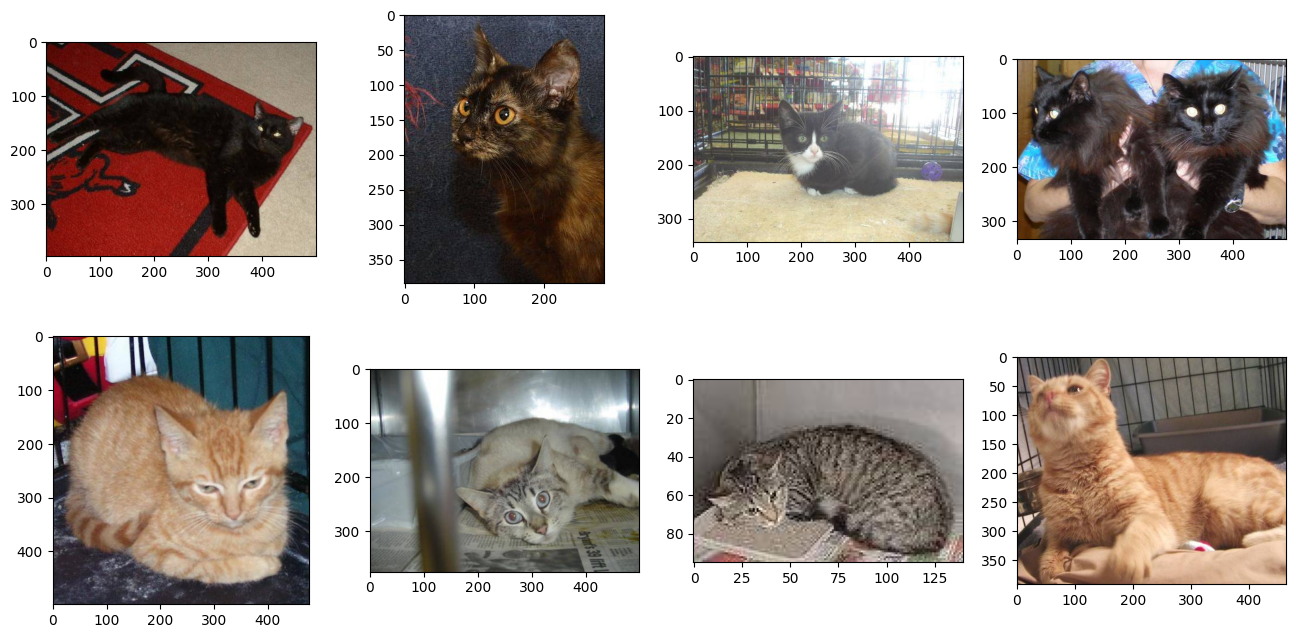

Train Dogs


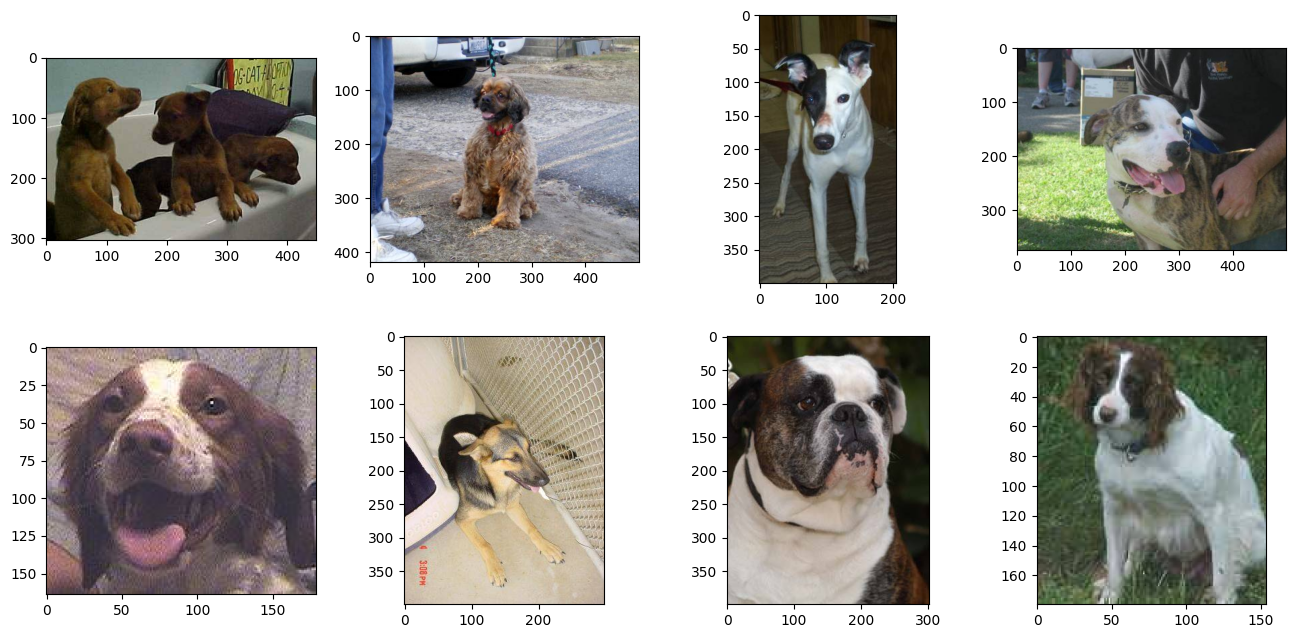

Test Cats


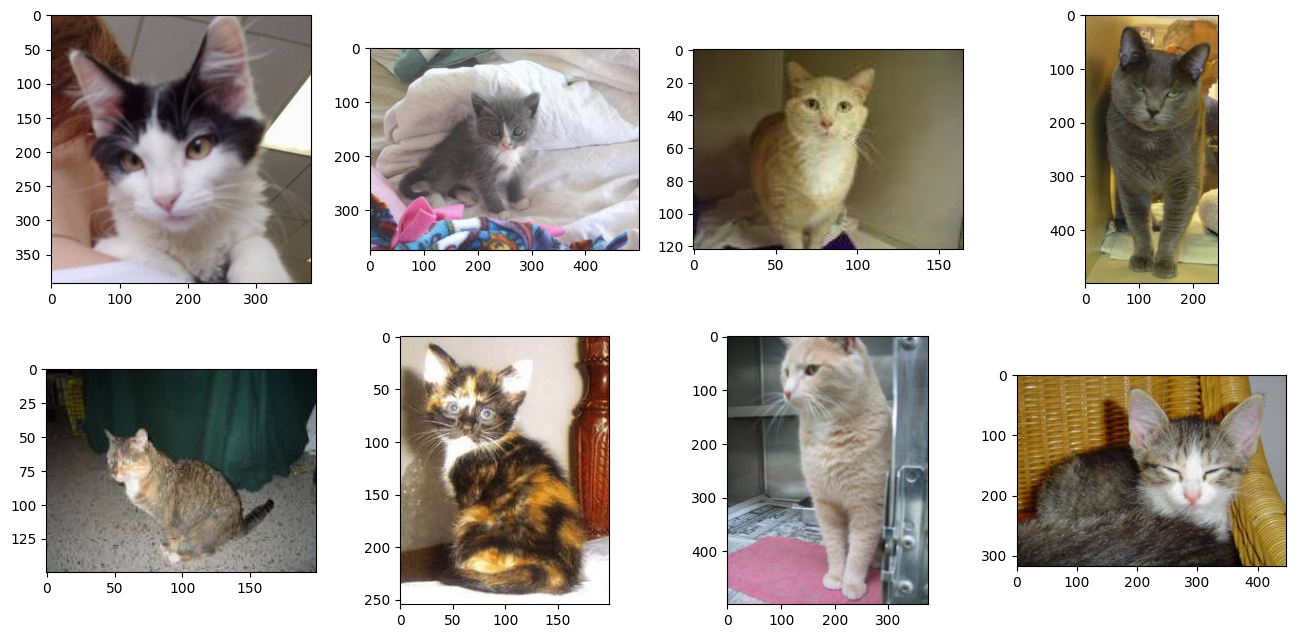

Test Dogs


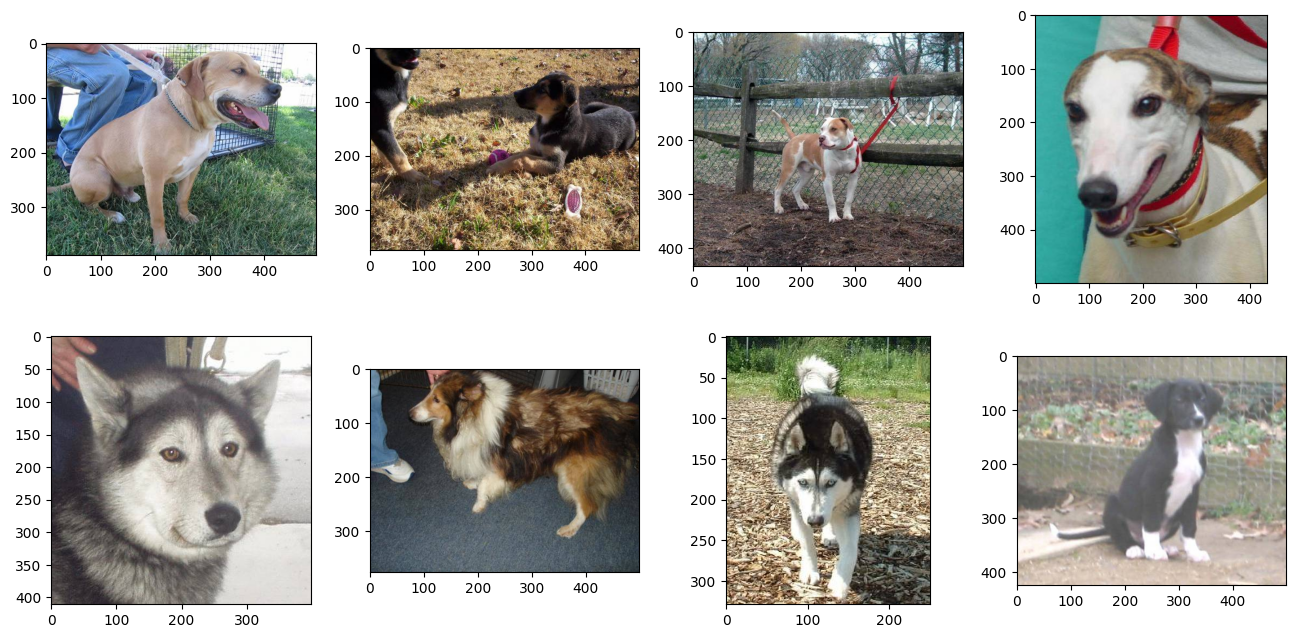

In [8]:
def print_pictures(dir, fnames):
  # presentaremos images en una configuración de 4x4
  nrows = 4
  ncols = 4

  pic_index = 0 # Índice para iterar sobre las imagenes

  fig = plt.gcf()
  fig.set_size_inches(ncols*4, nrows*4)

  pic_index+=8

  next_pix = [os.path.join(dir, fname)
                for fname in fnames[ pic_index-8:pic_index]
               ]

  for i, img_path in enumerate(next_pix):
    plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

  plt.show()

print("Train Cats")
print_pictures(train_cats_dir, train_cat_fnames)
print("Train Dogs")
print_pictures(train_dogs_dir, train_dog_fnames)
#print("Val Cats")
#print_pictures(validation_cats_dir, validation_cat_fnames)
#print("Val Dogs")
#print_pictures(validation_dogs_dir, validation_dog_fnames)
print("Test Cats")
print_pictures(test_cats_dir, test_cat_fnames)
print("Test Dogs")
print_pictures(test_dogs_dir, test_dog_fnames)

## Modelo básico

###Aumentado de imágenes

In [9]:
def to_grayscale(x):
    return tf.image.rgb_to_grayscale(x)

data_augmentation = Sequential([
    Lambda(to_grayscale),                   # Convertir a blanco y negro
    RandomFlip("horizontal_and_vertical"),  # Volteo aleatorio
    RandomRotation(0.8),                    # Rotación aleatoria (hasta 288°)
    RandomBrightness(0.5)                   # Ajuste de brillo aleatorio (mas o menos 20%)
])

### optimizador e hiperparámetros

In [10]:
model = Sequential()
model.add(data_augmentation)
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2)) # 2,2 tamaño de la matriz
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))  # 2,2 tamaño de la matriz
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))  # 2,2 tamaño de la matriz
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))  # 2,2 tamaño de la matriz
model.add(Flatten())          # convierte la imágencuadrada a un vector simple
model.add(BatchNormalization()) #Acelera el entrenamiento
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) #desactiva aleatoriamente algunas neuronas
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(#optimizer=RMSprop(learning_rate=1e-4),
              optimizer=optimizer,
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Usaremos la clase ImageDataGenerator para alimentar con lotes (batches) a la red
#y no tener que leer todas las imágenes en memoria (solo cargaremos el lote en proceso).

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(224, 224))

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (224, 224))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode='binary',
                                                        shuffle= False,
                                                         target_size = (224, 224))

Found 1000 images belonging to 2 classes.


In [15]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

###Adición de callbacks

In [17]:
history = model.fit(
      train_generator,
      epochs=10,
      validation_data=validation_generator,
      verbose=1,
      callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
      ]
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - accuracy: 0.5145 - loss: 1.4777 - val_accuracy: 0.5000 - val_loss: 0.7592 - learning_rate: 1.0000e-04
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.5241 - loss: 1.3882 - val_accuracy: 0.5000 - val_loss: 0.7330 - learning_rate: 1.0000e-04
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.4717 - loss: 1.3281 - val_accuracy: 0.5000 - val_loss: 0.9452 - learning_rate: 1.0000e-04
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.4946 - loss: 1.0749 - val_accuracy: 0.5000 - val_loss: 0.7266 - learning_rate: 1.0000e-04
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.5392 - loss: 1.0269 - val_accuracy: 0.5000 - val_loss: 0.7918 - learning_rate: 1.0000e-04
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.5050 - loss: 1.2283 - val_accuracy: 0.4990 - val_loss: 0.6942 - learning_rate: 1.0000e-04
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - a

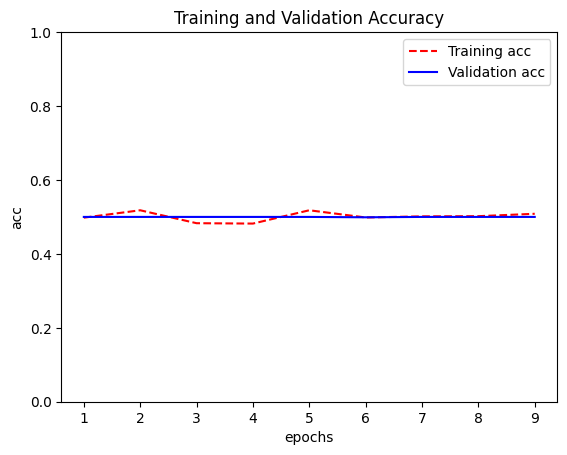

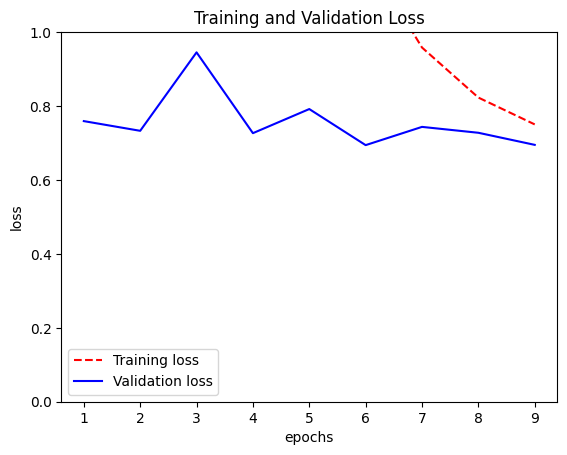

<Figure size 640x480 with 0 Axes>

In [18]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.ylim([0,1])
plt.figure()

plt.plot  ( epochs, loss, 'r--', label='Training loss'  )
plt.plot  ( epochs, val_loss ,  'b', label='Validation loss' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.ylim([0,1])
plt.figure()
plt.show()

In [19]:
_, test_acc= model.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.1651 - loss: 0.7333
Test Accuracy: 0.5


In [20]:
NEW_IMG_SIZE = 224

resize_and_rescale = Sequential([
  Resizing(NEW_IMG_SIZE, NEW_IMG_SIZE),
  Rescaling(1./255)
])

Tamaño inicial:  (323, 403, 3)
Tamaño:  (224, 224, 3)


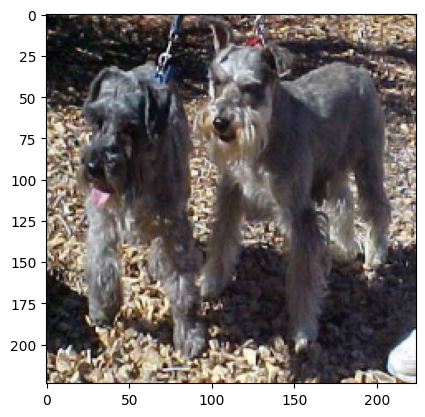

In [21]:
img = plt.imread("/content/cats_and_dogs_small/test/dogs/dog.1518.jpg")
#img = plt.imread("/content/cats_and_dogs_small/test/cats/cat.2240.jpg")

imagen = resize_and_rescale(img)
print('Tamaño inicial: ', img.shape)
print('Tamaño: ', imagen.shape)
plt.imshow(imagen)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
[[0.5281737]]


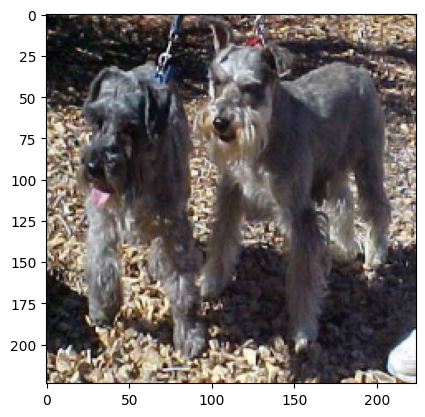

IS A DOG


In [22]:
imagen4d=np.expand_dims(imagen, axis=0)
predictions = model.predict(imagen4d)
print(predictions)

plt.imshow(imagen)
plt.show()

if predictions>0.5:
    print("IS A DOG")
else:
    print("IS A CAT")

In [23]:
image_paths = [
    "/content/cats_and_dogs_small/test/dogs/dog.1518.jpg",
    "/content/cats_and_dogs_small/test/cats/cat.1517.jpg",
    "/content/cats_and_dogs_small/test/dogs/dog.1529.jpg"
]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.5281737]]
Tamaño inicial:  (323, 403, 3)
Tamaño:  (224, 224, 3)


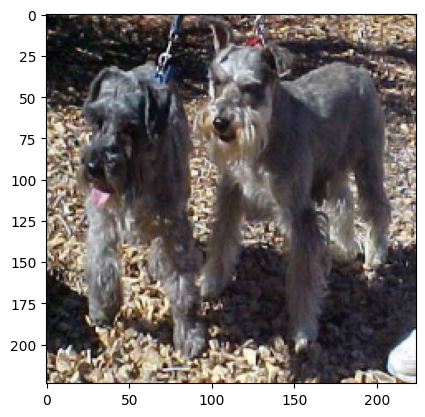

IS A DOG
Tamaño inicial:  (150, 199, 3)
Tamaño:  (224, 224, 3)


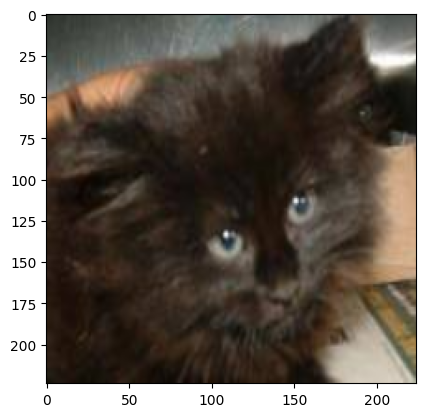

IS A DOG
Tamaño inicial:  (374, 500, 3)
Tamaño:  (224, 224, 3)


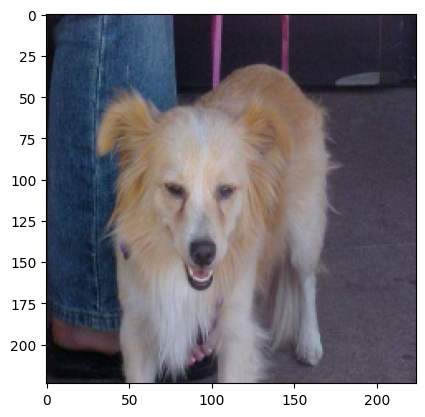

IS A DOG


In [24]:
imagen4d=np.expand_dims(imagen, axis=0)
predictions = model.predict(imagen4d)
print(predictions)

for i in range(3):
    img = plt.imread(image_paths[i])
    imagen = resize_and_rescale(img)
    print('Tamaño inicial: ', img.shape)
    print('Tamaño: ', imagen.shape)
    plt.imshow(imagen)
    plt.show()

    if predictions>0.5:
        print("IS A DOG")
    else:
        print("IS A CAT")